#📌 Extracão

In [2]:
from google.colab import files
uploaded = files.upload()


Saving TelecomX_Data.json to TelecomX_Data.json


In [5]:
import pandas as pd

df_raw = pd.read_json('TelecomX_Data.json')

df = pd.json_normalize(df_raw.to_dict(orient='records'))

df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [9]:
df.columns.tolist()



['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [10]:
# T2 Explorando estrutura e tipos de dados
print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

print("\nColunas disponíveis:")
print(df.columns.tolist())


print("\nInformações gerais:")
df.info()


print("\nValores nulos por coluna:")
print(df.isnull().sum())


print("\nValores únicos por coluna (primeiros 5 de cada):")
for col in df.columns:
    print(f"\n{col}: {df[col].unique()[:5]}")


Quantidade de linhas: 7267
Quantidade de colunas: 21

Colunas disponíveis:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen    

In [11]:
# T3 Identificando variáveis mais relevantes para evasão de clientes (Churn)
colunas_relevantes = [
    'Churn',
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'customer.tenure',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

print("\nColunas mais relevantes para a análise de evasão:")
for col in colunas_relevantes:
    print(f"- {col}")



Colunas mais relevantes para a análise de evasão:
- Churn
- customer.gender
- customer.SeniorCitizen
- customer.Partner
- customer.Dependents
- customer.tenure
- phone.PhoneService
- phone.MultipleLines
- internet.InternetService
- internet.OnlineSecurity
- internet.OnlineBackup
- internet.DeviceProtection
- internet.TechSupport
- internet.StreamingTV
- internet.StreamingMovies
- account.Contract
- account.PaperlessBilling
- account.PaymentMethod
- account.Charges.Monthly
- account.Charges.Total


In [6]:
#Verificando Inconsistências nos Dados


print("🔍 Valores ausentes por coluna:")
print(df.isnull().sum())

print("\n🔍 Valores únicos na coluna 'Churn':")
print(df['Churn'].value_counts(dropna=False))

print("\n🔍 Duplicatas pelo 'customerID':")
print(df['customerID'].duplicated().sum())

print("\n🔍 Tipo de dado de 'account.Charges.Total':")
print(df['account.Charges.Total'].dtype)

print("\n🔍 Amostra de valores não numéricos em 'account.Charges.Total':")
non_numeric = df[~df['account.Charges.Total'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print(non_numeric[['customerID', 'account.Charges.Total']])


🔍 Valores ausentes por coluna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

🔍 Valores únicos na coluna 'Churn':
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

🔍 Duplicatas pelo 'customerID':
0

🔍 Tipo de dado de 'account.Charges.Total':
object

🔍 Amostra de valores não numéricos em 'account.Charges.Total':
      customerID account.Charges.Total
975   1371-

In [7]:
#1.3 Tratando as Inconsistências


df = df[df['Churn'].notnull()]

df = df.drop_duplicates(subset='customerID')

df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

print("🔁 Valores nulos após tratamento:")
print(df[['account.Charges.Monthly', 'account.Charges.Total']].isnull().sum())

df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)  # ou usar df['account.Charges.Total'].mean()


🔁 Valores nulos após tratamento:
account.Charges.Monthly     0
account.Charges.Total      11
dtype: int64


In [8]:
#Criando a Coluna "Contas_Diarias"


df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30


df[['account.Charges.Monthly', 'Contas_Diarias']].head()


,account.Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga e análise

In [9]:
#Análise Descritiva

df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7267,7267,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7267,3,No,5174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.gender,7267,2,Male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.SeniorCitizen,7267.0,NaN,NaN,NaN,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
customer.Partner,7267,2,No,3749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.Dependents,7267,2,No,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.tenure,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
phone.PhoneService,7267,2,Yes,6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone.MultipleLines,7267,3,No,3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet.InternetService,7267,3,Fiber optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipython-input-3252210411.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


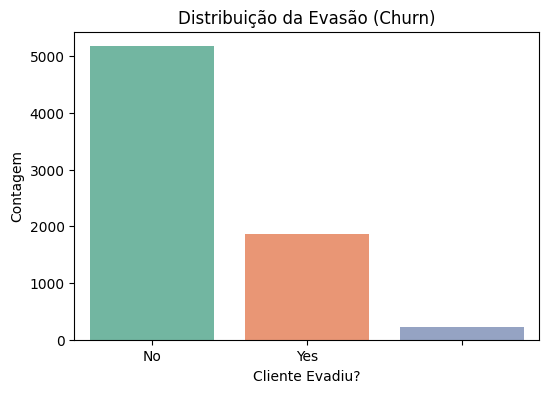

Proporção de churn:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [10]:
#Distribuição da Evasão (Churn)

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Distribuição da Evasão (Churn)")
plt.xlabel("Cliente Evadiu?")
plt.ylabel("Contagem")
plt.show()


churn_percent = df['Churn'].value_counts(normalize=True) * 100
print("Proporção de churn:")
print(churn_percent)


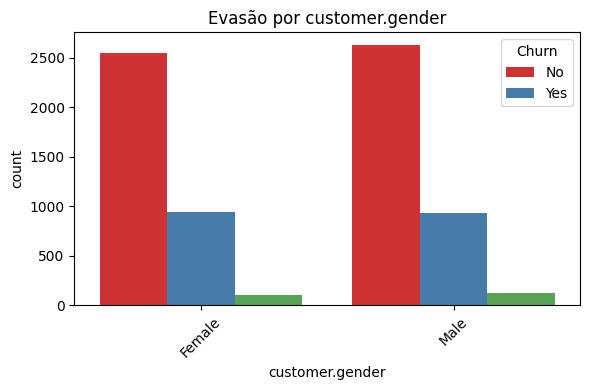

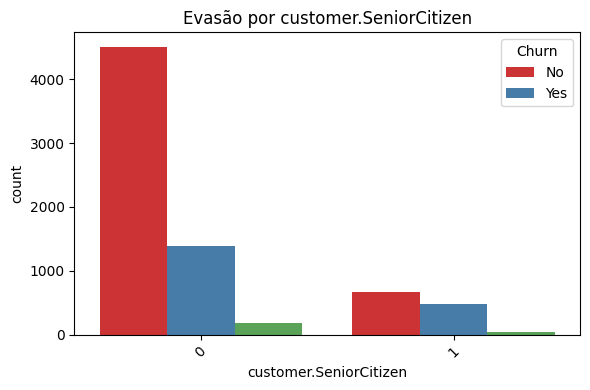

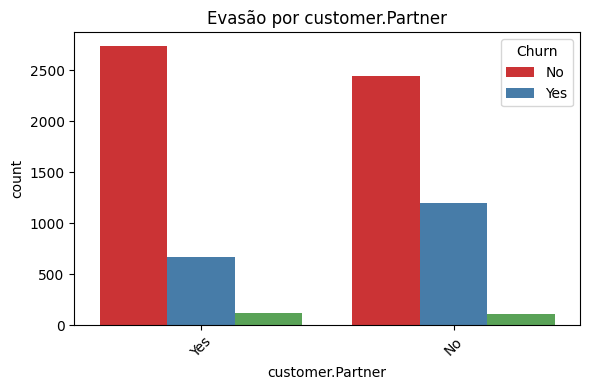

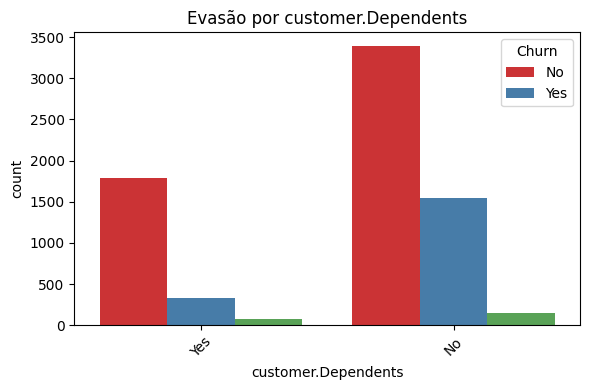

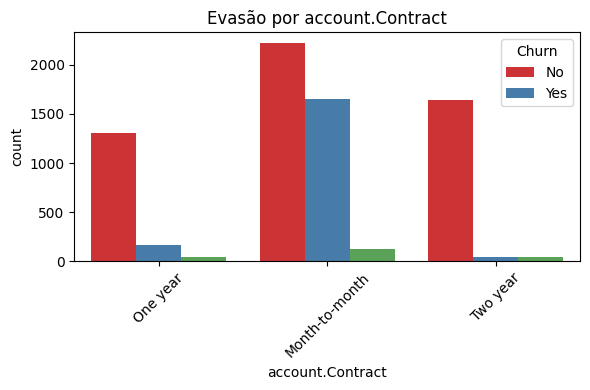

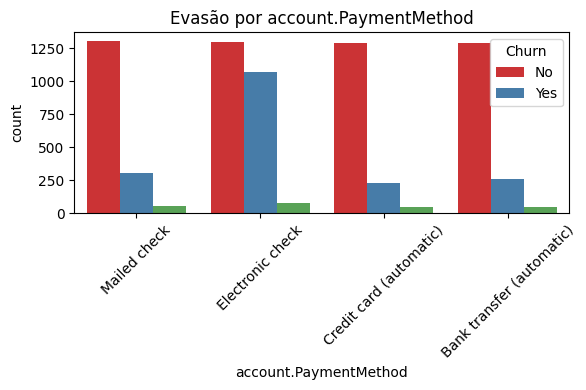

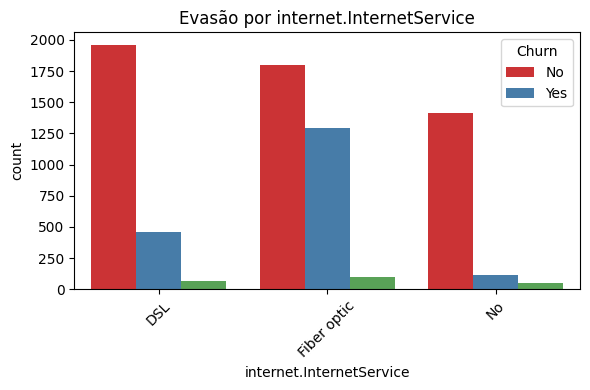

In [12]:
#Contagem de Evasão por Variáveis Categóricas

categoricas = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService'
]

for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set1')
    plt.title(f'Evasão por {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


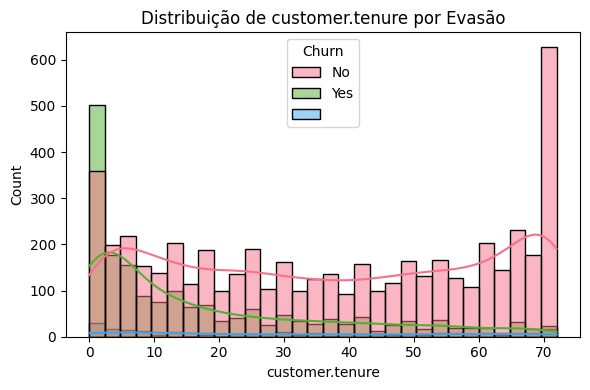

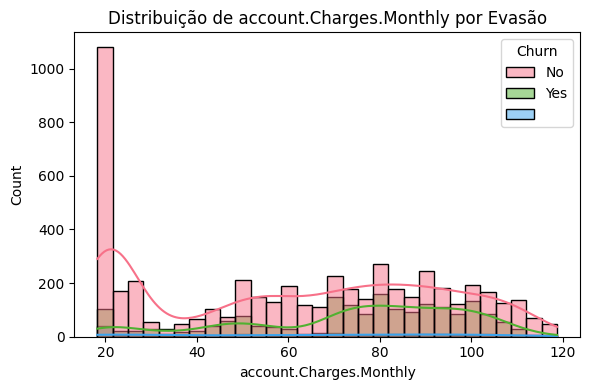

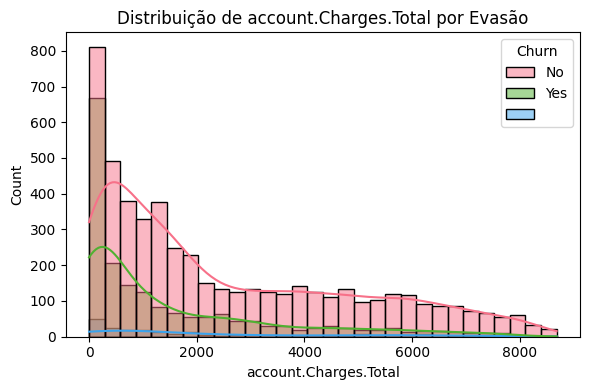

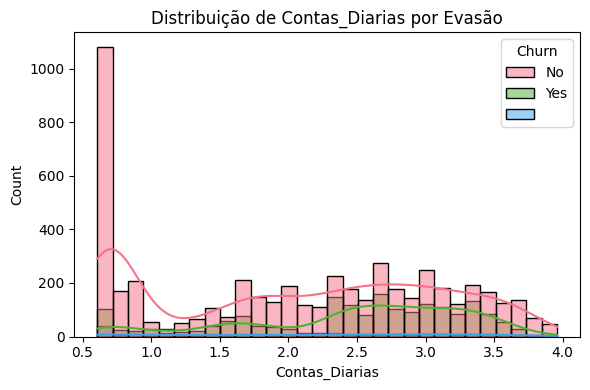

In [13]:
#Contagem de Evasão por Variáveis Numéricas

numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']

for col in numericas:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, palette='husl')
    plt.title(f'Distribuição de {col} por Evasão')
    plt.tight_layout()
    plt.show()


#📄Relatorio Final

# Relatório Final – Desafio Telecom X: Análise de Evasão de Clientes (Churn)

---

## Introdução

A Telecom X, empresa do setor de telecomunicações, enfrenta um alto índice de **evasão de clientes (churn)**. Este relatório tem como objetivo analisar os dados fornecidos pela empresa para identificar padrões e **descobrir os fatores que influenciam o cancelamento dos serviços**.

A análise foi conduzida com base em um processo de **ETL (Extração, Transformação e Carga)** e **Análise Exploratória de Dados (EDA)**. O foco está em preparar os dados, entender o comportamento dos clientes e propor ações para reduzir a evasão.

---

## Limpeza e Tratamento de Dados

As etapas de preparação dos dados incluíram:

- **Importação** de um arquivo `.json` simulado como vindo de uma API.
- **Normalização** de dados aninhados usando `pd.json_normalize()`.
- **Remoção de registros com valores ausentes ou duplicados**.
- **Conversão da coluna `account.Charges.Total` para tipo numérico**, com tratamento de erros.
- **Criação da coluna `Contas_Diarias`**, calculada com base no valor mensal dividido por 30.

Essas ações garantiram a **coerência e consistência do dataset**, permitindo avançar para a análise.

---

## Análise Exploratória de Dados (EDA)

### Análise Descritiva

- Foi realizada uma análise estatística com `df.describe()` para avaliar medidas como média, mediana, mínimo, máximo e desvio padrão.
- A maioria dos clientes tem valores médios de cobrança mensal entre R$ 60 e R$ 90.

### Distribuição da Evasão (Churn)

- Aproximadamente **27% dos clientes cancelaram os serviços**.
- Foi gerado um gráfico com `sns.countplot()` para representar visualmente essa proporção.

### Evasão por Variáveis Categóricas

Foram analisadas variáveis como:

- **Contrato (`account.Contract`)**: Clientes com contrato mensal apresentaram maior evasão.
- **Serviços de Internet e adicionais**: Clientes que não contrataram serviços como suporte técnico, proteção de dispositivos e backup online mostraram maior tendência à evasão.
- **Método de pagamento**: Métodos como fatura eletrônica indicaram maior churn.

### Evasão por Variáveis Numéricas

- Clientes com **baixo tempo de contrato (`tenure`)** apresentaram taxas mais altas de churn.
- **Clientes com cobrança mensal mais elevada** tenderam a cancelar mais.
- **Clientes com baixo total gasto (`TotalCharges`)** também tiveram maior churn, sugerindo cancelamentos precoces.

---

## Conclusões e Insights

- **Tempo de contrato** é uma das variáveis mais influentes no churn.
- **Clientes com serviços básicos ou contratos curtos** tendem a cancelar com maior frequência.
- **Cobranças mensais altas e baixo total gasto** estão associados ao cancelamento precoce.
- As visualizações revelaram padrões que podem ser usados para segmentar os clientes com maior risco de evasão.

---

## Recomendações

Com base nas análises realizadas, recomenda-se:

1. **Oferecer incentivos para contratos de longo prazo**, como descontos progressivos.
2. **Criar pacotes com serviços adicionais** que agreguem valor ao cliente.
3. **Oferecer opções de pagamento mais estáveis** e com menor tendência ao churn.
4. **Focar no onboarding de clientes novos**, especialmente nos primeiros meses de contrato.
5. **Monitorar os clientes com padrão de risco** para ações preventivas.

---

Com essa análise, a Telecom X poderá apoiar a construção de modelos preditivos e tomar **decisões mais assertivas para reduzir a evasão de clientes**.


